# Shopping Trends

In [44]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("Data/shopping_trends_updated.csv")

In [3]:
df = df.set_index("Customer ID")
print(f"Shape of the data: {df.shape}")

Shape of the data: (3900, 17)


In [4]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


## Gender of the customers

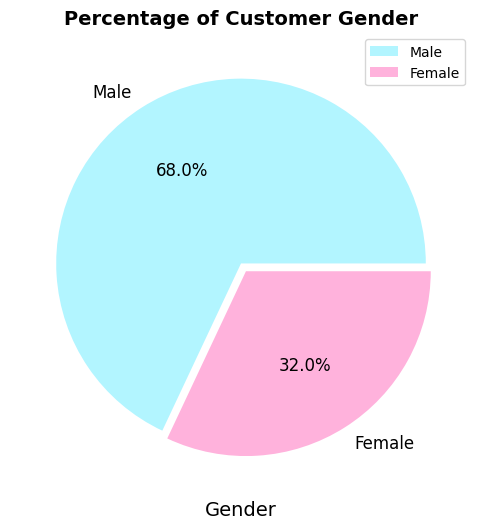

In [5]:
plt.figure(figsize = (20, 6))
gender = df["Gender"].value_counts()
gender.plot(kind = "pie", autopct = '%1.1f%%', fontsize = 12, colors=['#B2F5FF', '#FFB2DC'], explode = (0, 0.05))
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("")
plt.title("Percentage of Customer Gender", weight = "bold", fontsize = 14)
plt.legend()
plt.show()

## Purchases Frequency By Gender

In [6]:
female_data = df[df['Gender'] == 'Female']
female_pucharses = (female_data["Frequency of Purchases"].value_counts()/1248)*100
male_data = df[df["Gender"] == "Male"]
male_pucharses = (male_data["Frequency of Purchases"].value_counts()/2652)*100

### Plotting

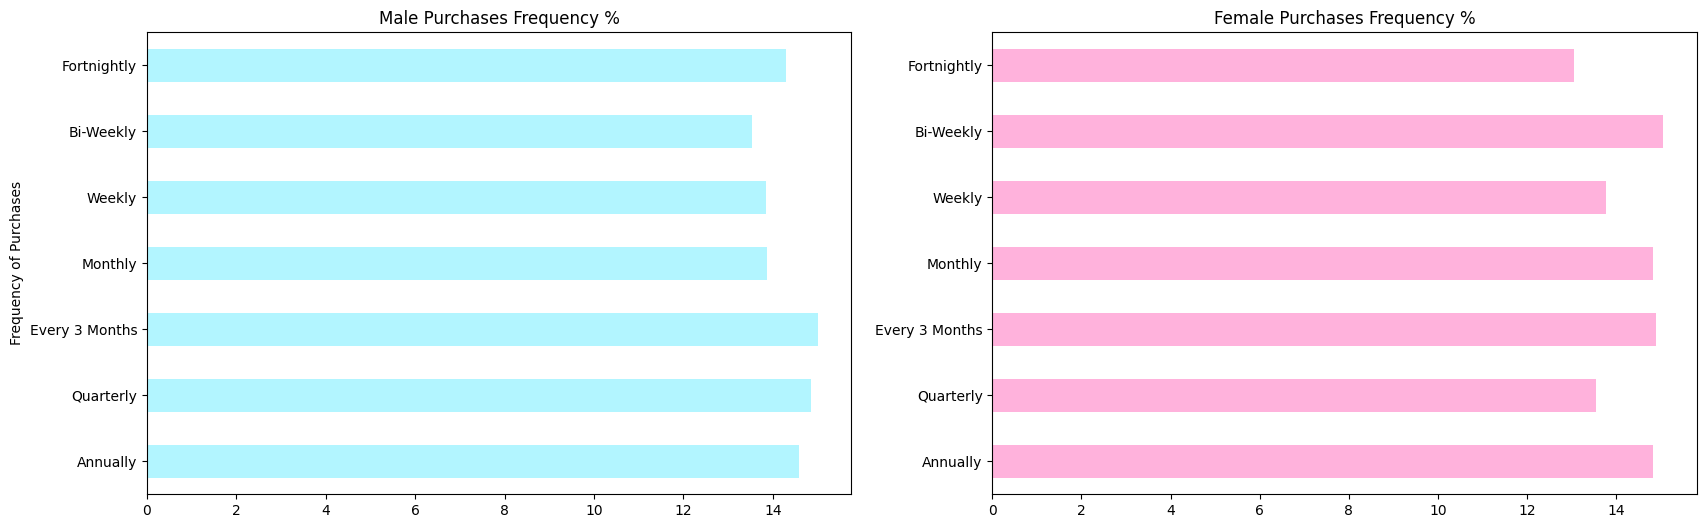

In [7]:
index_order = ['Annually', 'Quarterly', 'Every 3 Months', 'Monthly', 'Weekly', 'Bi-Weekly', 'Fortnightly']
male_pucharses = male_pucharses.reindex(index_order)
female_pucharses = female_pucharses.reindex(index_order)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
male_pucharses.plot(kind='barh', ax=axes[0], color='#B2F5FF')
female_pucharses.plot(kind='barh', ax=axes[1], color='#FFB2DC')

axes[0].set_title('Male Purchases Frequency %')
axes[0].set_ylabel('Frequency of Purchases')
axes[1].set_title("Female Purchases Frequency %")
axes[1].set_ylabel("")
plt.show()

## Item Purchase by location

In [8]:
filtered_clothing = df[df["Category"] == "Clothing"]
clothing = filtered_clothing.groupby("Location")["Category"].count()

filtered_accessories = df[df["Category"] == "Accessories"]
accessories = filtered_accessories.groupby("Location")["Category"].count()

filtered_footwear = df[df["Category"] == "Footwear"]
footwear = filtered_footwear.groupby("Location")["Category"].count()

filtered_outerwear = df[df["Category"] == "Outerwear"]
outerwear = filtered_outerwear.groupby("Location")["Category"].count()

### Plotting

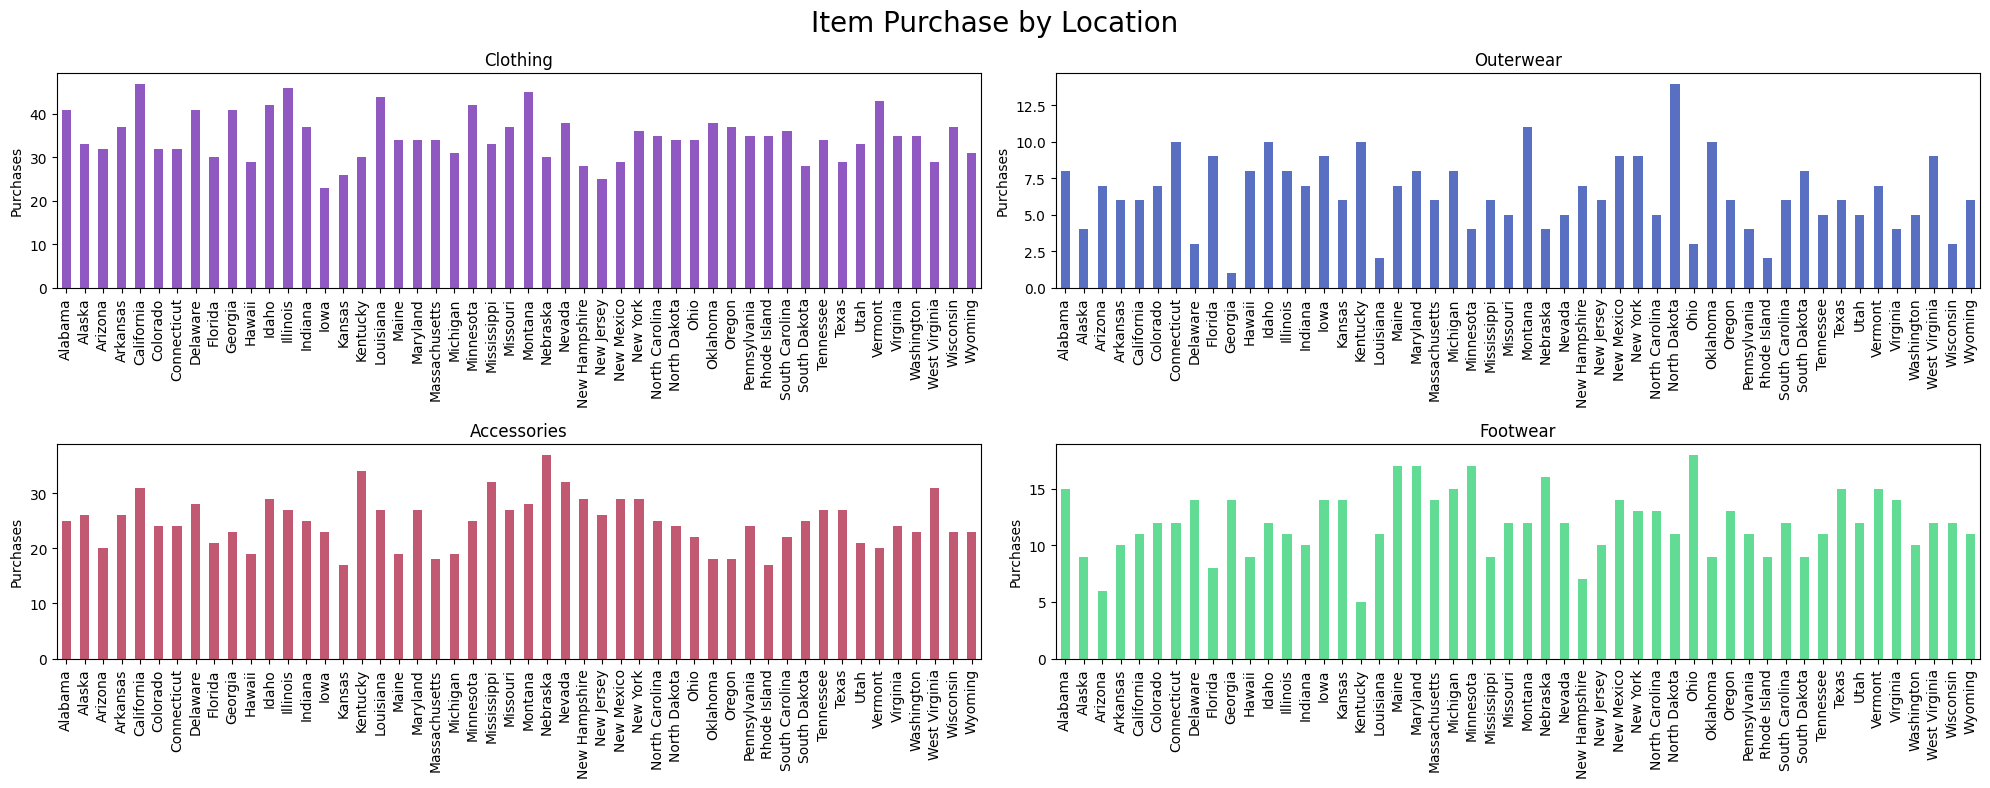

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
clothing.plot(kind = "bar", ax=axes[0,0], color="#9059C1")
accessories.plot(kind = "bar", ax=axes[1,0], color="#C15972")
footwear.plot(kind = "bar", ax=axes[1,1], color="#62DB95")
outerwear.plot(kind = "bar", ax=axes[0,1], color="#596FC1")

axes[0, 0].set_title('Clothing')
axes[0, 1].set_title('Outerwear')
axes[1, 0].set_title('Accessories')
axes[1, 1].set_title('Footwear')

axes[0,1].set_ylabel('Purchases')
axes[0,0].set_ylabel('Purchases')
axes[1,1].set_ylabel('Purchases')
axes[1,0].set_ylabel('Purchases')

axes[0,1].set_xlabel('')
axes[0,0].set_xlabel('')
axes[1,1].set_xlabel('')
axes[1,0].set_xlabel('')


fig.suptitle('Item Purchase by Location', fontsize=20)
plt.tight_layout()
plt.show()

## Item Pucharse by Seasons

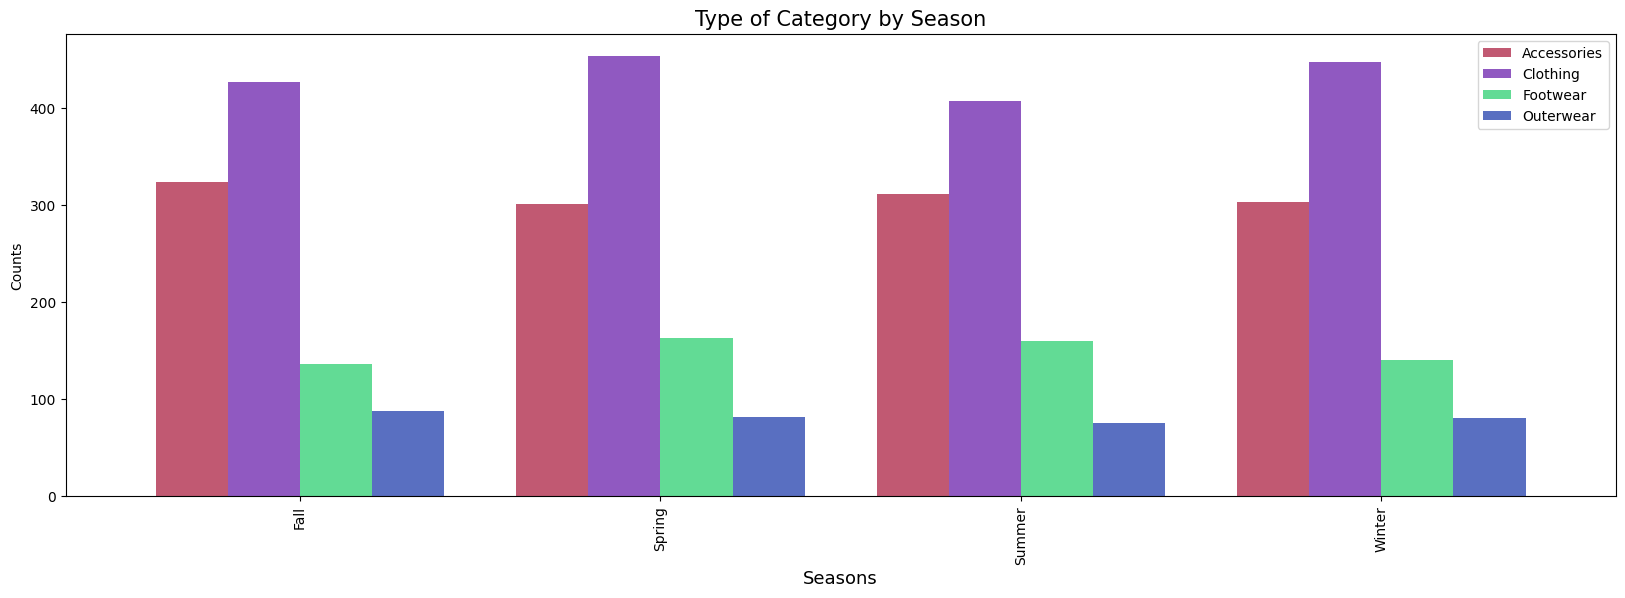

In [13]:
seasons = df.groupby("Season")["Category"].value_counts()
seasons = seasons.unstack()

ax = seasons.plot(kind='bar', figsize=(20, 6), width=0.8, color=["#C15972" ,"#9059C1","#62DB95","#596FC1"], fontsize=10)

ax.set_xlabel('Seasons', fontsize=13)
ax.set_ylabel('Counts')
ax.set_title('Type of Category by Season', fontsize = 15)
ax.legend()

plt.show()

## Category Purchase Amount

In [31]:
purchase = df.groupby("Category")["Purchase Amount (USD)"].sum()

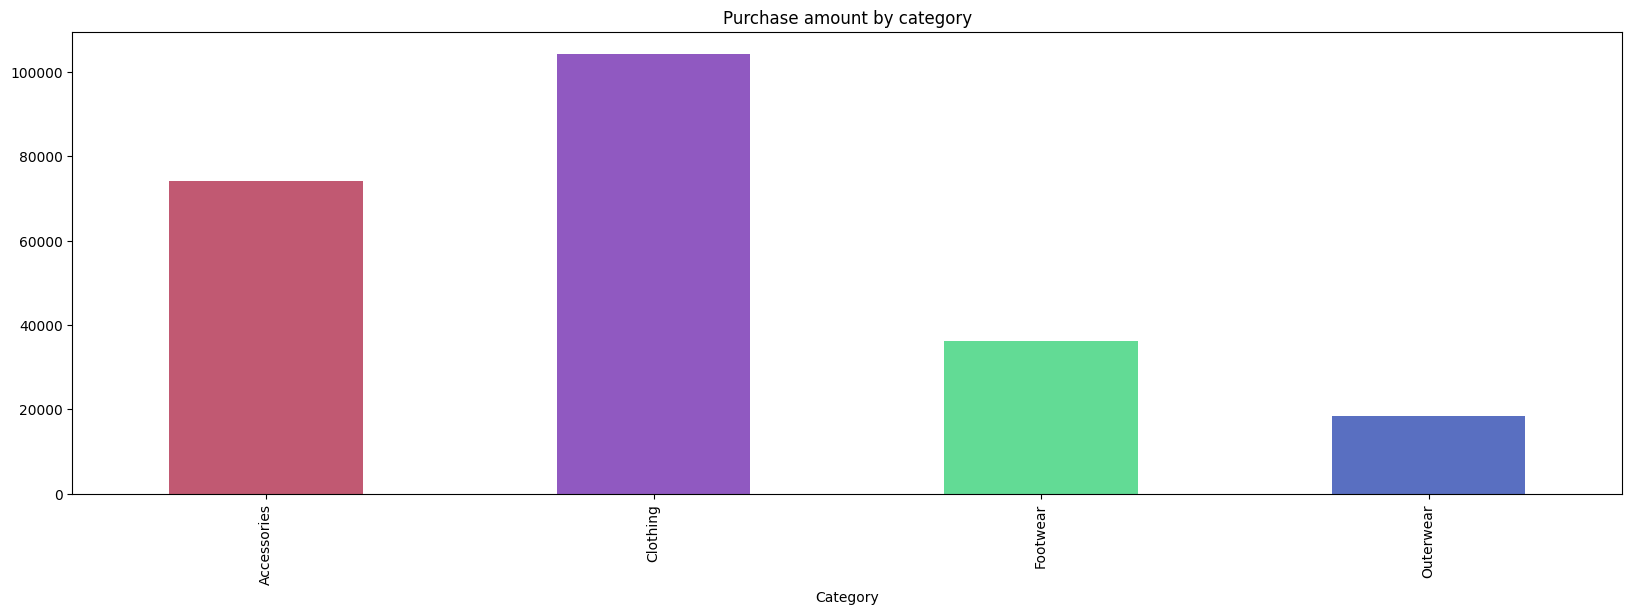

In [43]:
purchase.plot(kind = "bar", figsize=(20,6),color=["#C15972" ,"#9059C1","#62DB95","#596FC1"])
plt.title("Purchase amount by category")
plt.show()